In [2]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from ripple_detection import Karlsson_ripple_detector, Kay_ripple_detector

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Simulate LFP with Ripple

In [4]:
from ripple_detection.simulate import simulate_time
import scipy.stats

SAMPLING_FREQUENCY = 1000
n_samples = SAMPLING_FREQUENCY * 3
time = simulate_time(n_samples, SAMPLING_FREQUENCY)
white_noise = np.random.normal(size=time.shape)
RIPPLE_FREQUENCY = 200
ripple_signal = np.sin(2 * np.pi * time * RIPPLE_FREQUENCY)
carrier = scipy.stats.norm(loc=1.1, scale=0.025).pdf(time)
carrier /= carrier.max()

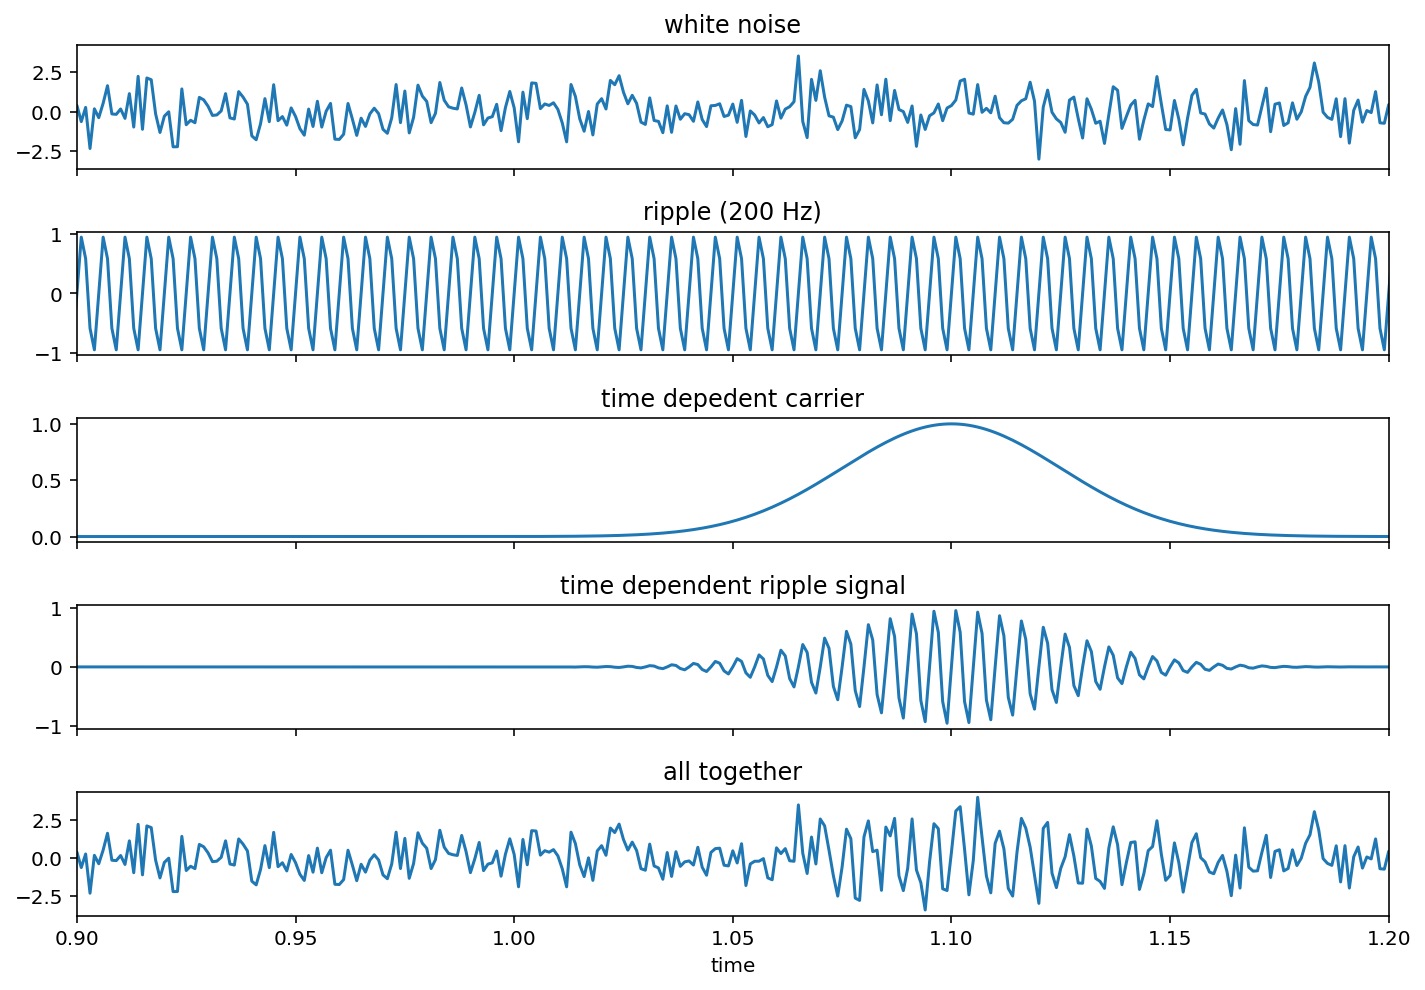

In [5]:
f, ax = plt.subplots(5, 1, sharex=True, figsize=(10, 7))
ax[0].plot(time, white_noise)
ax[0].set_title('white noise')
ax[1].plot(time, ripple_signal)
ax[1].set_title('ripple (200 Hz)')
ax[2].plot(time, carrier)
ax[2].set_title('time depedent carrier')
ax[3].plot(time, (ripple_signal * carrier));
ax[3].set_title('time dependent ripple signal')
ax[4].plot(time, 5 / 2 * (ripple_signal * carrier) + white_noise);
ax[4].set_title('all together')
ax[4].set_xlabel('time')

plt.xlim(0.9, 1.2)
plt.tight_layout()

In [7]:
time

array([0.000e+00, 1.000e-03, 2.000e-03, ..., 2.997e+00, 2.998e+00,
       2.999e+00])

# Test Ripple Detectors

### Single LFP

Simulate a single LFP with ripples at time 1.1 and time 2.1
This is with brown noise $\frac{1}{f^2}$

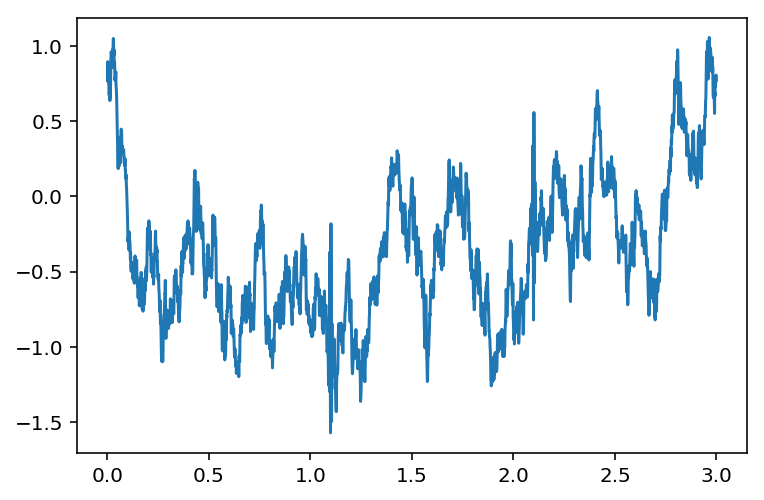

In [5]:
from ripple_detection.simulate import simulate_LFP

LFPs = simulate_LFP(time, [1.1, 2.1], noise_amplitude=1.2, ripple_amplitude=1.5)[:, np.newaxis]
plt.plot(time, LFPs)
speed = np.ones_like(time)

,start_time,end_time
ripple_number,,
1,1.085,1.115
2,2.079,2.118


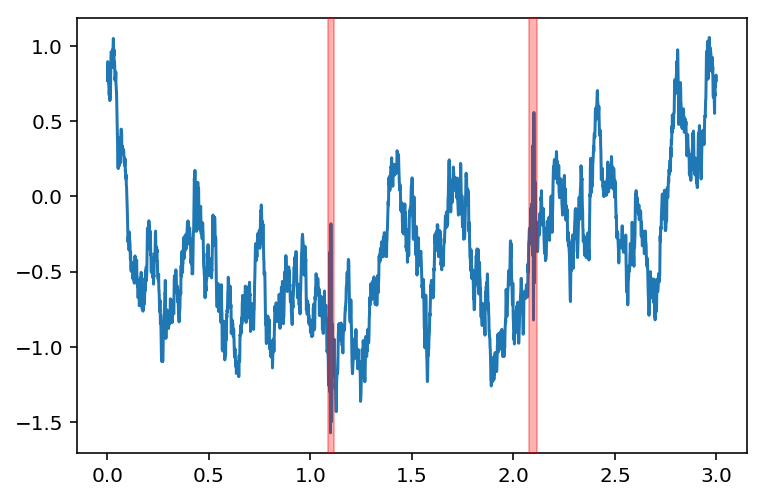

In [6]:
Karlsson_ripple_times = Karlsson_ripple_detector(time, LFPs, speed, SAMPLING_FREQUENCY)

display(Karlsson_ripple_times)

f, ax = plt.subplots()
ax.plot(time, LFPs)
for ripple in Karlsson_ripple_times.itertuples():
    ax.axvspan(ripple.start_time, ripple.end_time, alpha=0.3, color='red', zorder=1000)

,start_time,end_time
ripple_number,,
1,1.082,1.117
2,2.078,2.119


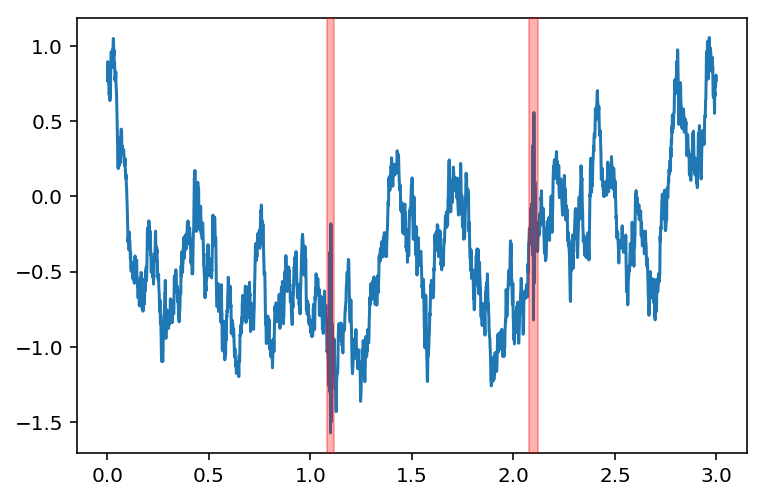

In [7]:
Kay_ripple_times = Kay_ripple_detector(time, LFPs, speed, SAMPLING_FREQUENCY)

display(Kay_ripple_times)

f, ax = plt.subplots()
ax.plot(time, LFPs)
for ripple in Kay_ripple_times.itertuples():
    ax.axvspan(ripple.start_time, ripple.end_time, alpha=0.3, color='red', zorder=1000)

In [8]:
LFPs

array([[0.76989411],
       [0.89521157],
       [0.89153099],
       ...,
       [0.79434329],
       [0.80594401],
       [0.77100609]])